# Project 1 - Part 3 Code

> 3.3

In [371]:
library(ggplot2)
library(reshape2)

In [372]:
simulate_coin <- function(n, q)
{
    L <- list()
    while (n > 0)
    {
        U <- runif(1, min=0, max=1)
        if (U < q)
        {
            #HEADS
            L <- c(L, 0)
            n <- n - 1
        }
        else
        {
            #TAILS
            L <- c(L, 1)
            n <- n - 1
        }
    }
    return(L)
}

In [373]:
find_longest_tails <- function(l)
{
    list_of_longest <- list()
    longest <- 0
    for (i in l)
    {
        if (i == 1)
        {
            longest <- longest + 1
        }
        else
        {
            list_of_longest <- c(list_of_longest, longest)
            longest <- 0
        }
    }
    return(max(unlist(list_of_longest)))
}

In [374]:
s <- 10000
list_of_sims <- list()
while (s > 0)
{
    a = simulate_coin(128, .5)
    list_of_sims <- c(list_of_sims, find_longest_tails(a))
    s <- s - 1
}

In [375]:
df <- do.call(rbind.data.frame, Map('c', list_of_sims))
colnames(df)[1] <- 'Bernoulli (from uniform)'

No id variables; using all as measure variables


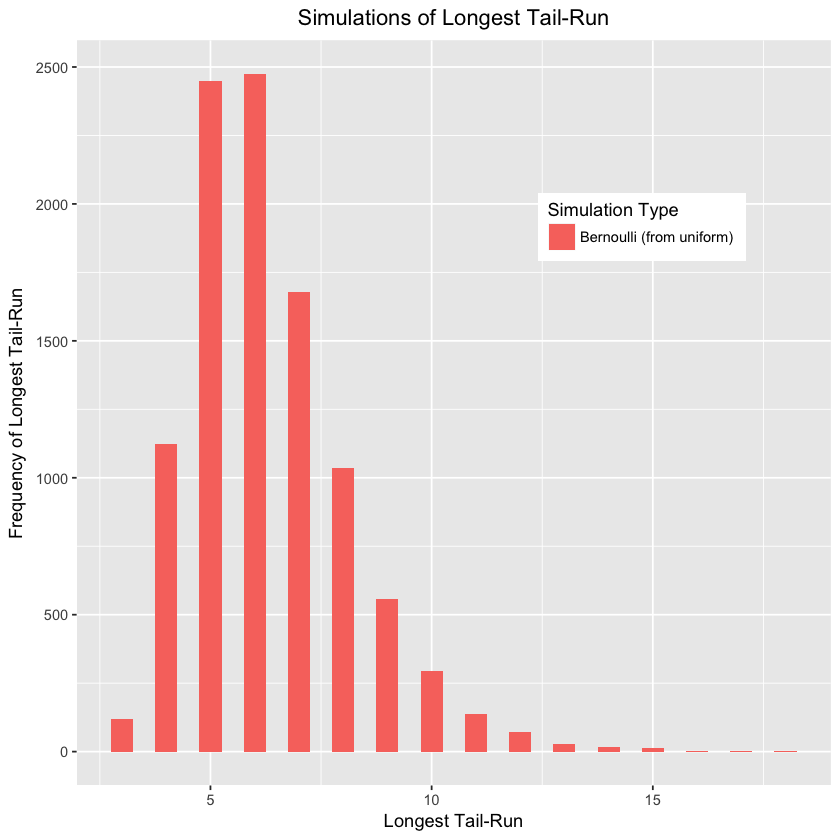

In [376]:
p <- ggplot(melt(df), aes(value, fill = variable)
           ) + geom_histogram(position = "dodge",  binwidth = .5)
p <- p + labs(x = "Longest Tail-Run", y = "Frequency of Longest Tail-Run") + ggtitle("Simulations of Longest Tail-Run") + guides(fill=guide_legend(title="Simulation Type")) + theme(plot.title = element_text(hjust = 0.5), legend.position = c(.75, .75))
p

In [377]:
ggsave(filename="bernoulli.pdf", plot=p)

Saving 7 x 7 in image


> 3.4

In [378]:
simulate_coin_geo <- function(n, q)
{
    L <- list()
    num = n * (1 - q)
    while (num > 0)
    {
        U <- runif(1, min=0, max=1)
        L <- c(L, floor(log(U) / log(1 - (1 - q))))
        num <- num - 1
    }
    return(L)
}

In [379]:
g <- 10000
list_of_geo_sims <- list()
while (g > 0)
{
    a = simulate_coin_geo(128, .5)
    list_of_geo_sims <- c(list_of_geo_sims, max(unlist(a)))
    g <- g - 1
}

In [380]:
df <- do.call(rbind.data.frame, Map('c', list_of_geo_sims))
colnames(df)[1] <- 'Geometric'

No id variables; using all as measure variables


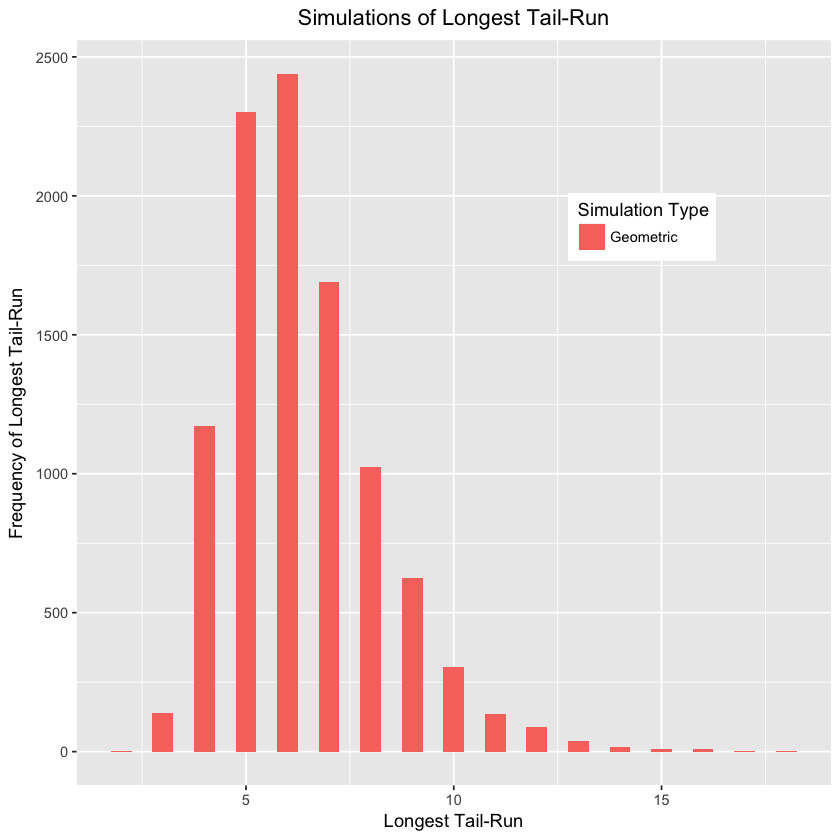

In [381]:
p <- ggplot(melt(df), aes(value, fill = variable)
           ) + geom_histogram(position = "dodge",  binwidth = .5)
p <- p + labs(x = "Longest Tail-Run", y = "Frequency of Longest Tail-Run") + ggtitle("Simulations of Longest Tail-Run") + guides(fill=guide_legend(title="Simulation Type")) + theme(plot.title = element_text(hjust = 0.5), legend.position = c(.75, .75))
p

In [382]:
ggsave(filename="geometric.pdf", plot=p)

Saving 7 x 7 in image


>3.5

In [383]:
df <- do.call(rbind.data.frame, Map('c', list_of_sims, list_of_geo_sims))

In [384]:
colnames(df)[1] <- 'Bernoulli (from uniform)'
colnames(df)[2] <- 'Geometric'

In [385]:
df

Bernoulli (from uniform),Geometric
8,5
6,9
6,5
5,6
5,5
6,4
5,6
6,6
7,9
13,5


No id variables; using all as measure variables


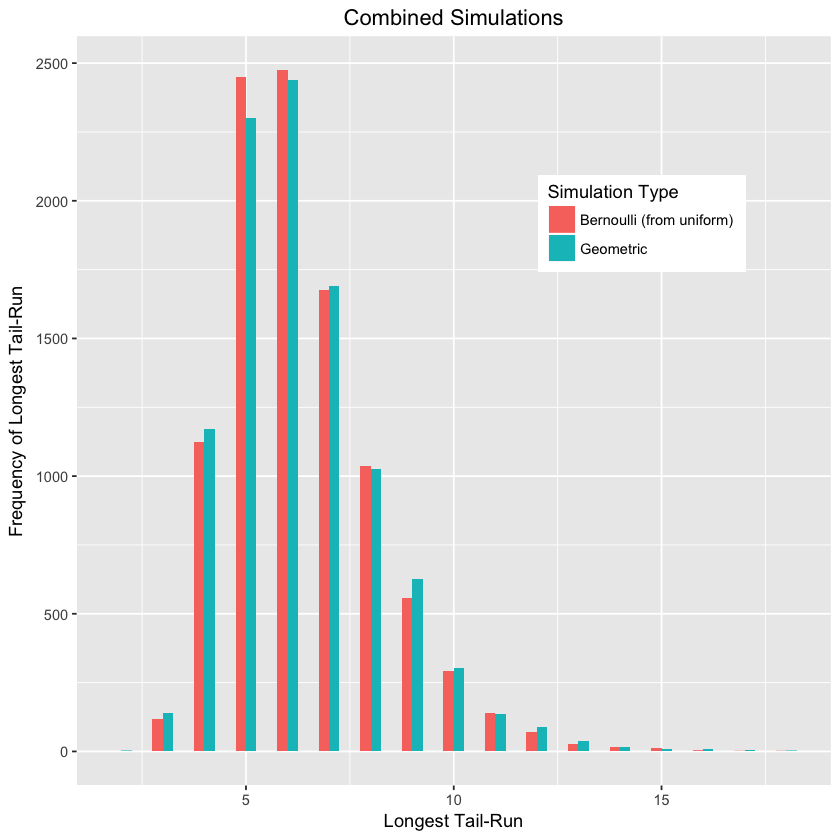

In [386]:
p <- ggplot(melt(df), aes(value, fill = variable)
           ) + geom_histogram(position = "dodge",  binwidth = .5)
p <- p + labs(x = "Longest Tail-Run", y = "Frequency of Longest Tail-Run") + ggtitle("Combined Simulations") + guides(fill=guide_legend(title="Simulation Type")) + theme(plot.title = element_text(hjust = 0.5), legend.position = c(.75, .75))
p

In [387]:
ggsave(filename="combined.pdf", plot=p)

Saving 7 x 7 in image
